In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_raw = pd.read_csv(r"C:\Users\lenovo\Downloads\household_power_consumption.txt", delimiter = ";")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5864\2812513746.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(r"C:\Users\lenovo\Downloads\household_power_consumption.txt", delimiter = ";")


In [3]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [5]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [7]:
# Combine the 'Date' and 'Time' columns into a new column called 'Datetime'
df['Datetime'] = df['Date'] + '  ' + df['Time']

# Convert the 'Datetime' column to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M:%S')

In [8]:
# Create a list of column names to convert
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert the columns to numeric types
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [10]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

In [11]:
df.Date[0]

datetime.date(2006, 12, 16)

In [12]:
df.Time[0]

datetime.time(17, 24)

In [13]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


<AxesSubplot:>

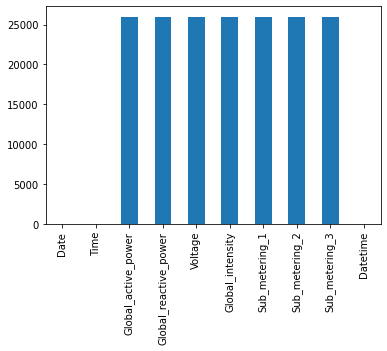

In [14]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

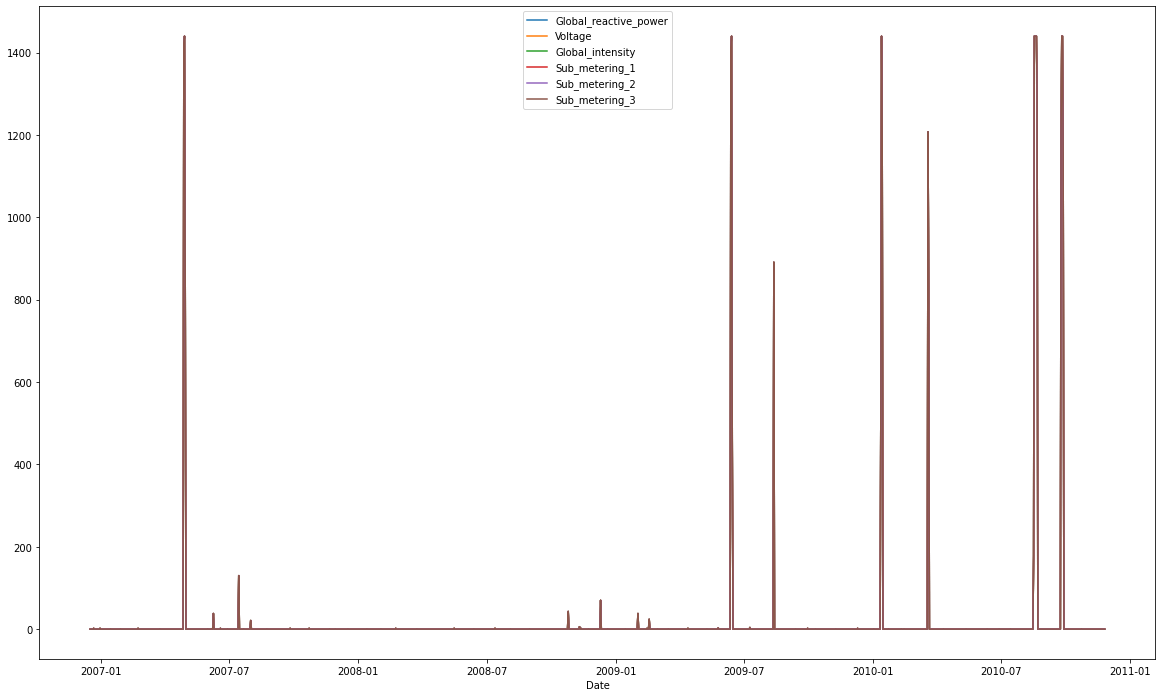

In [15]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1],figsize=(20, 12))

Q: What do you notice about the pattern of missing data? 

A: From the graph, it is evident that the missing data for all the columns exist on the same day or for the same records. The data is null for all the columns on the same days. The data for all the columns is filled with values on all the remaining days. As a result, the total number of null values for all the columns is the same, i.e., 25979 records

Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)

                                                                                       
A:There are two important ways to deal with the missing data. They are:
1. Remove the rows with missing columns. We can delete all the records that have missing values using the dropna() function. But, this can lead to the loss of valuable information of data of other columns.
2. The empty or null cells in few records can be filled with the function fillna() by passing different input parameters. The empty or null value can be filled with the mean or median of the remaining empty columns. They can also be filled with the most frequent occuring value in that column. However, this can lead to inaccurate results and a proper machine learning model can't be built.

In [16]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [17]:
#clean up missing data here
# Drop all rows with missing values
df = df.dropna(how='any')

In [18]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [19]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.

A: The variables that I choose are:

Global_active_power: The global active power will provide us the amount of real power that is consumed, which is the pwer that is used to run the household devices and can be converted into mechanical energy.

Global_reactive_power: The gloval reactive power will provide us with the total amount of reactive power that is supplied to the households. This information about the reactive power supply is very important as it helps to maintain the voltage potential difference between the customer end and the supplier end. Increase or decrease in the global reactive power supply can effect the working of the electrical devices and increase the fluctuations in the voltage supply. The ratio of active power and the reactive power can help to find the power factor of the supply line, which is very useful in determining the efficiency of the distribution line.

Voltage: The voltage in the transmission line is used to ensure that the supply is not working at undervolatge or overvolatge and the faults in the transmission lines can be identified and also to establish the relation between the reactive power supply and the voltage.

Global_intensity: It provides the total current consumed by the households. It gives us the information about the total load on the transmission line at different intervals of time. This data can be useful in predicting the future household demand of current and supply can be optimized and reduce the total power losses on the lines.

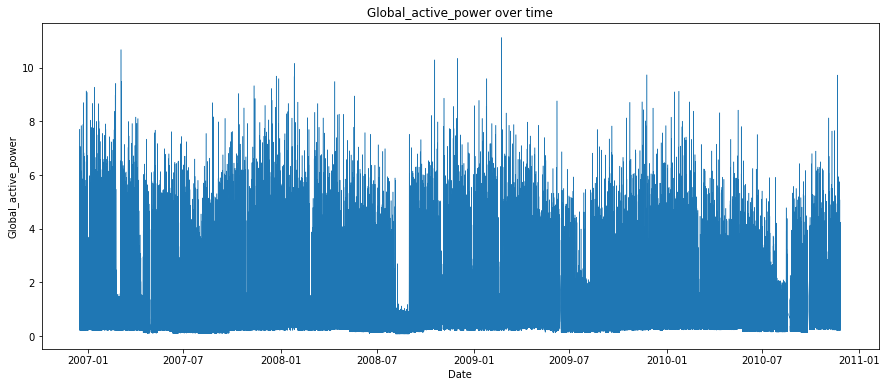

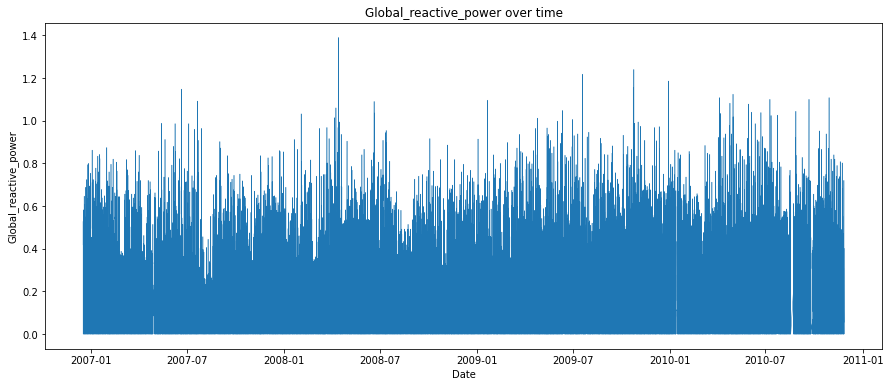

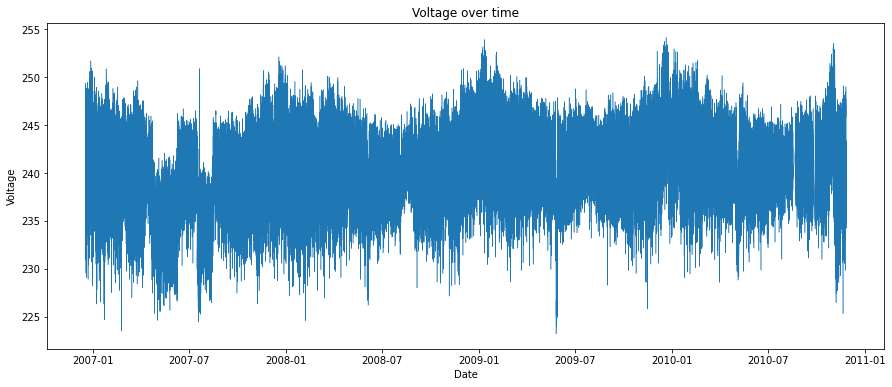

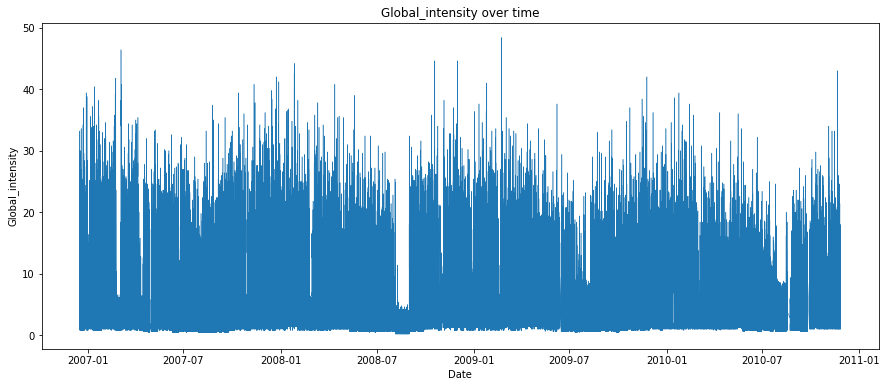

In [20]:
# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Choose four variables to visualize over time
vars_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create a line chart for each variable
for var in vars_to_plot:
    # Filter the dataframe to remove missing values for the variable
    df_cleaned = df[df[var].notnull()]
    
    # Create line chart
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(df_cleaned['Datetime'], df_cleaned[var], linewidth=0.5)
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    ax.set_title(var + ' over time')
    plt.show()

Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?

A: The raw data visualization gives us the information of the trend in the demand for the active power, reactive power, voltage and the current used over a period of time. This type of visualization is not so useful because it doesn't give us the information of all the variables accurately. It is very dificult to analyze these variables in this plot.

In [21]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Compute monthly averages for each variable
monthly_avg = df.resample('M', on='Datetime').mean()

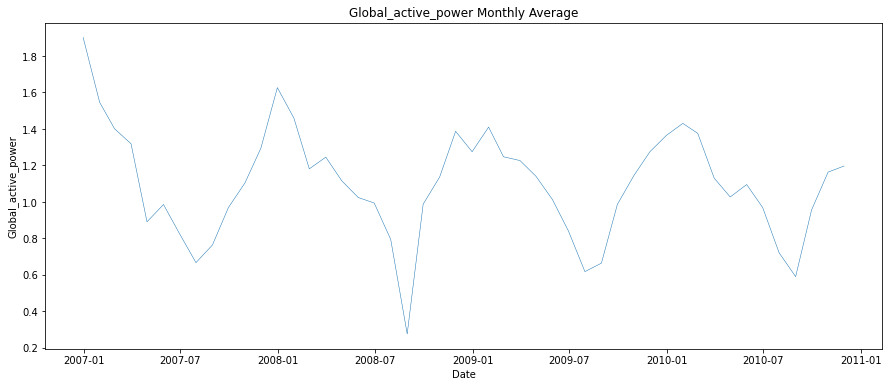

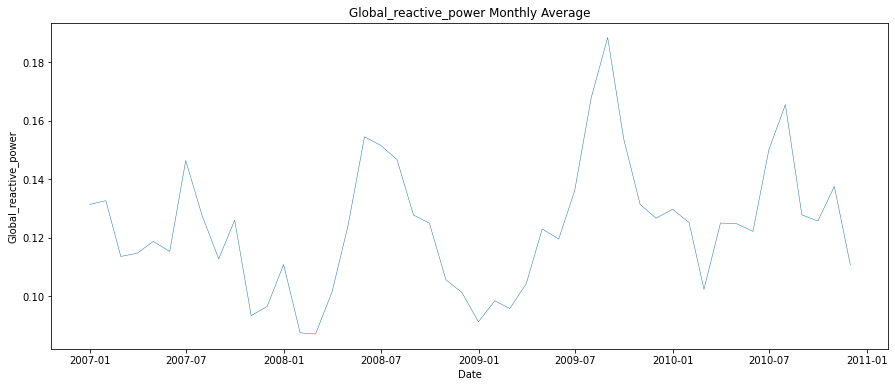

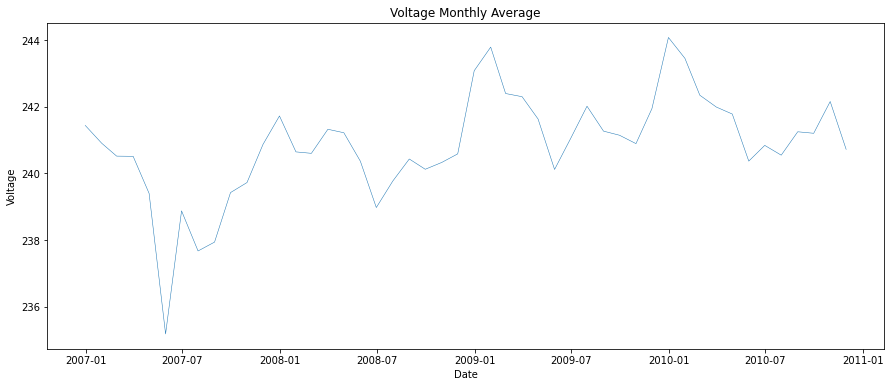

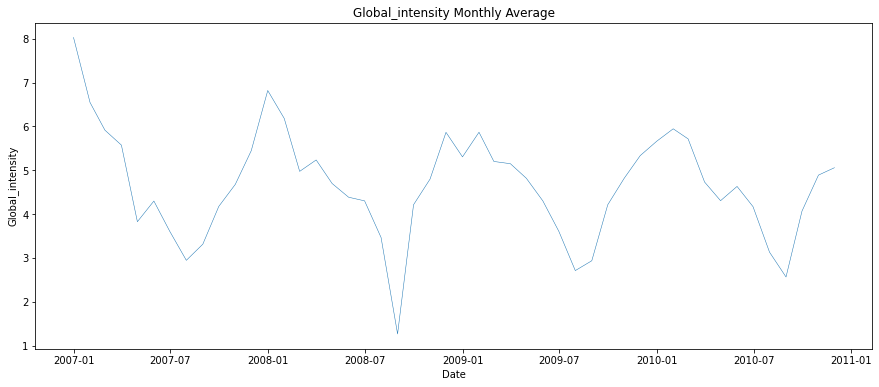

In [22]:
# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Choose four variables to visualize over time
vars_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create a line chart for each variable
for var in vars_to_plot:
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(monthly_avg.index, monthly_avg[var], linewidth=0.5)
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    ax.set_title(var + ' Monthly Average')
    plt.show()


Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?

A: We can establish the relation between all the four variables in the montly data by the movement of the monthly average. The "Global_active_power monthly average", "Voltage monthly average" and "Global_intensity monthly average" are following almost the same trend line. They have the peaks and lows almost at the same time and the 3 variables lines are in direct proportionality with each other. The "Global_reactive_power monthly average" is working opposite to the 3 other variables. It peaks whenever they all are at lows and vice versa. This indicates that this variable is inversely proportional to the other variables.

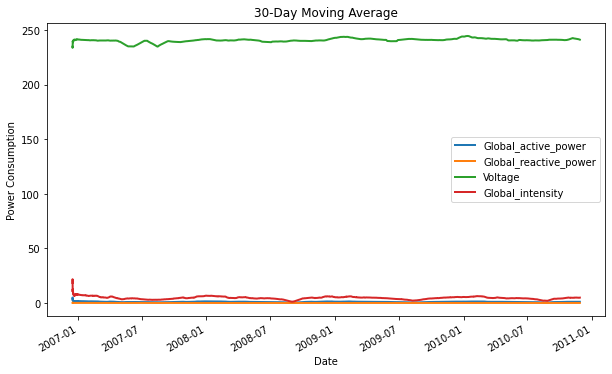

In [23]:
# Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Compute the 30-day moving average for each variable
vars_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
rolling_mean = df[vars_to_plot].rolling('30D').mean()

# Visualize the data
fig, ax = plt.subplots(figsize=(10,6))
rolling_mean.plot(ax=ax, lw=2)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')
ax.set_title('30-Day Moving Average')
plt.show()


Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?


A: The moving average gives us information precisely for the data on a shorter duration of time like weekly or monthly basis. It helps to analyze data for small intervals. Whereas, the monthly average can help us to analyze the data for longer time intervals. So, if the data is huge and spread over long periods of time, the monthly average can be more useful than the moving average. 

In this case, monthly average is more effective in analyzing the trends as the data is spread over many years and can't be properly analyzed using the 30-day moving average.

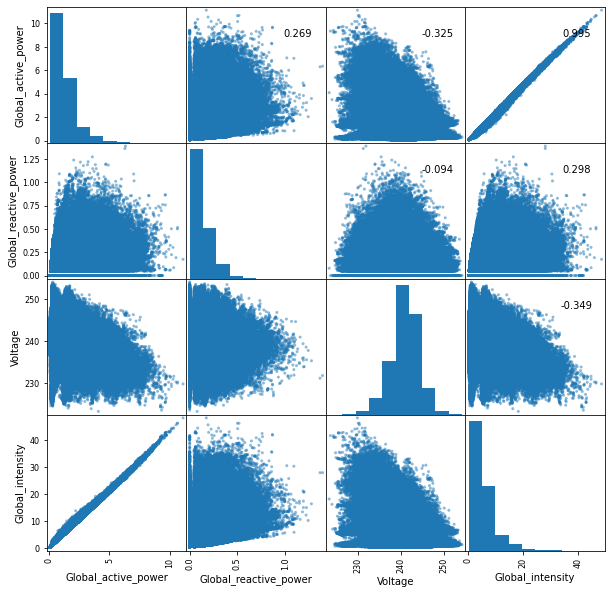

In [24]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?


A. We can derive the extent of proportionality all the four variables are correlated with each other. The values in the grid shows how each variable is correlated with the other variables. The positive sign indicates that with the increase in one parameter, the other parameter also increases. The negative value of correlation indicates that with increase of one variable, the other value decreases. Also, the variables are correlated to each other only to extent and they become saturated after reaching a threshold. 